# Imports

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the data and take a look at it.

In [2]:
!ls

boxplot.png                      takehome_user_engagement.csv
confusion_matrix.png             takehome_users.csv
relax_data_science_challenge.pdf workbook.ipynb


In [3]:
filenames = os.listdir()
filenames

['confusion_matrix.png',
 '.DS_Store',
 'takehome_users.csv',
 'relax_data_science_challenge.pdf',
 'workbook.ipynb',
 'boxplot.png',
 '.ipynb_checkpoints',
 'takehome_user_engagement.csv']

In [4]:
with open('takehome_users.csv') as f:
    print(f)

<_io.TextIOWrapper name='takehome_users.csv' mode='r' encoding='UTF-8'>


In [5]:
users_df = pd.read_csv('takehome_users.csv', encoding='latin-1')
# don't know why encoding seems like it's UTF-8, but is really latin-1

In [6]:
users_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [7]:
user_engagement_df = pd.read_csv('takehome_user_engagement.csv')

In [8]:
user_engagement_df

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


The `user_engagement` DataFrame will be the first focus because it will show which users meet the engagement criteria of having at least 3 log-ins within a 7-day period. This will be done be casting the log-in time to a datetime object and setting the time as the index for the DataFrame, then grouping by user id and rolling a 7-day window over the groups tallying up counts of `visited`. Then, individual user ID's are summarized for users that meet the engagement threshold, and then these ID's are flagged in the `users_df` DataFrame of user features.

In [9]:
user_engagement_df.visited.unique()

array([1])

In [10]:
user_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [11]:
user_engagement_df.time_stamp = pd.to_datetime(user_engagement_df.time_stamp)
user_engagement_df.set_index('time_stamp', inplace=True)

In [12]:
user_engagement_df.sort_index(inplace=True)

In [13]:
user_engagement_df['2013':'2013']

,user_id,visited
time_stamp,,
2013-01-01 00:11:04,2042,1
2013-01-01 00:51:13,7590,1
2013-01-01 00:59:56,2622,1
2013-01-01 01:03:55,3269,1
2013-01-01 01:13:02,8297,1
...,...,...
2013-12-31 23:41:46,529,1
2013-12-31 23:45:11,8221,1
2013-12-31 23:52:36,11004,1


In [14]:
seven_day_engagement = user_engagement_df.groupby('user_id').rolling('7d').sum()

In [15]:
engaged_users = np.array([user for user, date in seven_day_engagement[seven_day_engagement.visited >= 3].index])

In [16]:
engaged_users = np.unique(engaged_users)

In [17]:
len(engaged_users)

1602

Looks like there are 1602 users that meet the threshold of being engaged.

In [18]:
users_df['engaged'] = [1 if users_df.object_id[i] in engaged_users else 0 for i in range(len(users_df))]

Now the features of each users can be downselected, scaled, and fitted.

In [19]:
users_df.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,engaged
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1


In [20]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  engaged                     12000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [21]:
users_df.nunique()

object_id                     12000
creation_time                 11996
name                          11355
email                         11980
creation_source                   5
last_session_creation_time     8821
opted_in_to_mailing_list          2
enabled_for_marketing_drip        2
org_id                          417
invited_by_user_id             2564
engaged                           2
dtype: int64

Columns `object_id`, `creation_time`, `name`, `email`, and `last_session_creation_time` are very high entropy, so they will be dropped from the data.

In [22]:
users_df.drop(columns=['object_id', 'creation_time', 'name', 'email', 'last_session_creation_time'], inplace=True)

In [23]:
users_df.invited_by_user_id = users_df.invited_by_user_id.fillna(0).astype('int32')

In [24]:
users_df = pd.get_dummies(users_df)

In [25]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   opted_in_to_mailing_list            12000 non-null  int64
 1   enabled_for_marketing_drip          12000 non-null  int64
 2   org_id                              12000 non-null  int64
 3   invited_by_user_id                  12000 non-null  int32
 4   engaged                             12000 non-null  int64
 5   creation_source_GUEST_INVITE        12000 non-null  uint8
 6   creation_source_ORG_INVITE          12000 non-null  uint8
 7   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8
 8   creation_source_SIGNUP              12000 non-null  uint8
 9   creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8
dtypes: int32(1), int64(4), uint8(5)
memory usage: 480.6 KB


Great - no missing values.

<AxesSubplot:>

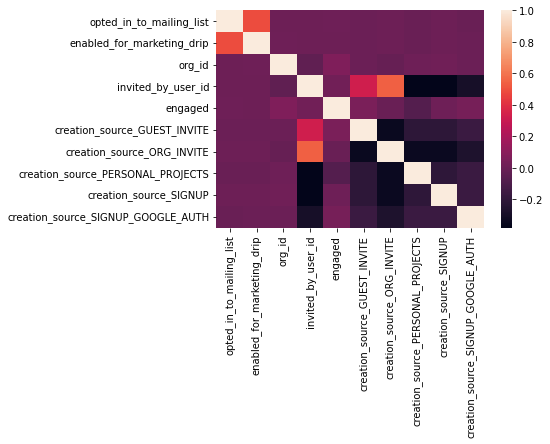

In [26]:
import seaborn as sns
corr = users_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Lastly, `opted_in_to_mailing_list` and `enabled_for_marketing_drip` are highly correlated and `invited_by_user_id` and `creating_source_ORG_INVITE` are highly correlated. It makes sense that users receiving the marketing drip have opted in, so the `opted_in_to_mailing_list` column will be dropped, as well as the `invited_by_user_id` column because those users appear to be the same users as those created by an org invite.

Lastly, there is some indication that engaged users correlate with `org_id`, so there may be some earlier indication that users who are part of a larger structure are retained.

In [27]:
users_df.drop(columns=['opted_in_to_mailing_list', 'invited_by_user_id'], inplace=True)

In [28]:
from sklearn.model_selection import train_test_split
X = users_df.drop(columns='engaged')
y = users_df.engaged
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train[X_train.columns] = SS.fit_transform(X_train)

In [30]:
X_test[X_test.columns] = SS.transform(X_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
models = list()
models.append(('KNN', KNeighborsClassifier(n_jobs=-1)))
models.append(('RNC', RadiusNeighborsClassifier(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('LSVC', LinearSVC()))
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('RC', RidgeClassifier()))
models.append(('MLPC', MLPClassifier()))
models.append(('RFC', RandomForestClassifier(n_jobs=-1)))
models.append(('GBC', GradientBoostingClassifier()))

In [33]:
from sklearn.model_selection import cross_validate
scores = list() 

In [34]:
for model in models:
    cv_results = cross_validate(model[1], X_train, y_train, cv=10, n_jobs=-1)
    scores.append((model[0], cv_results['test_score']))

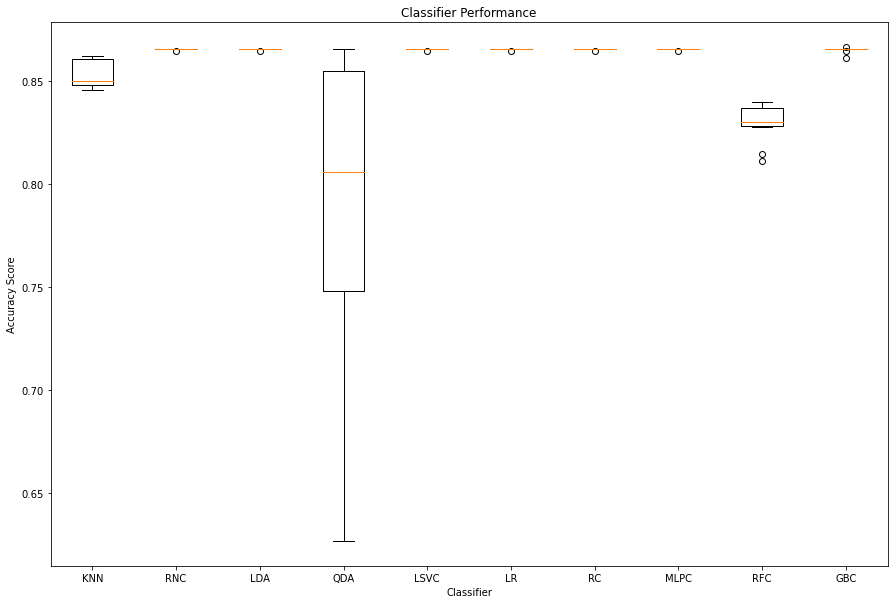

In [35]:
scores = list(zip(*scores))
fig = plt.figure(figsize =(15, 10))
ax = fig.add_subplot(111)
bp = ax.boxplot(scores[1], labels=scores[0])
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy Score')
ax.set_title('Classifier Performance')

plt.savefig('boxplot.png')
plt.show()

The Random Forest Classifier does pretty well without overfitting, is popular, and is simple, so this will be explore more deeply.

In [36]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [37]:
print(model.score(X_test, y_test))

0.83


In [38]:
model.feature_importances_

array([0.00792905, 0.96956812, 0.00428498, 0.00272891, 0.00890064,
       0.00206232, 0.00452599])

In [39]:
weights = pd.DataFrame(list(zip(model.feature_names_in_, model.feature_importances_)), columns=['feature', 'coefficient']).sort_values(by='coefficient', axis=0, ascending=False).reset_index().drop(columns='index')

In [40]:
weights

,feature,coefficient
0,org_id,0.969568
1,creation_source_PERSONAL_PROJECTS,0.008901
2,enabled_for_marketing_drip,0.007929
3,creation_source_SIGNUP_GOOGLE_AUTH,0.004526
4,creation_source_GUEST_INVITE,0.004285
5,creation_source_ORG_INVITE,0.002729
6,creation_source_SIGNUP,0.002062


In [41]:
y_pred = model.predict(X_test)

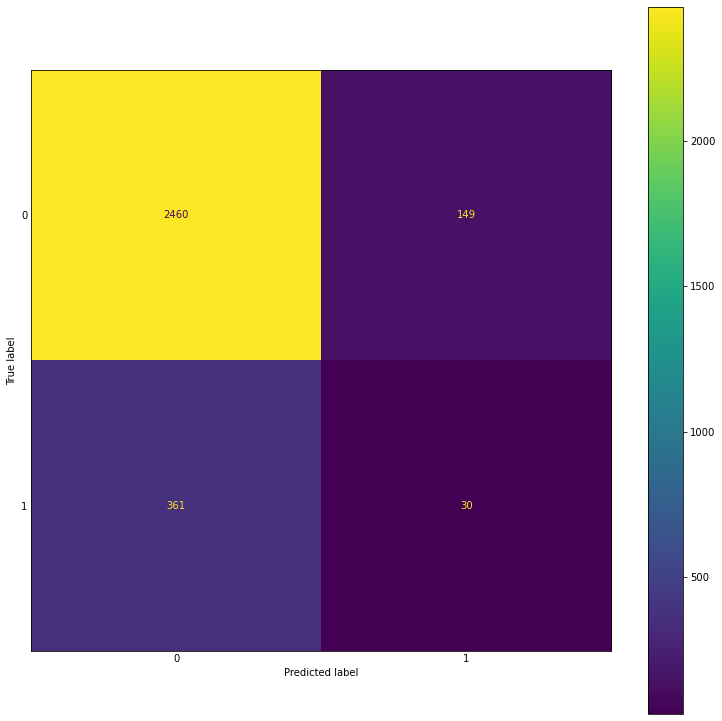

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(13,13))
disp.plot(ax=ax)
plt.tick_params(axis=u'both', which=u'both', length=0)
plt.xticks(ticks=range(0, 2), labels=model.classes_)
plt.yticks(ticks=range(0, 2), labels=model.classes_)
plt.grid(False)

plt.savefig('confusion_matrix.png')
plt.show()

# Result

Overwhelmingly, the organization a user belongs to predicts engagement. To grow more users, Relax, Inc. should focus on features that aid organizational workflows. Secondly, users who sign up to work on personal projects also remain somewhat engaged but with plenty of room to grow, so this could be a high-impact focus group when driving new retention.